In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Импортирую датасет из CSV файла.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Wind Power/dataset.csv')

Посмотрим на данные.

In [ ]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
data.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

Дата в неверном формате. Преобразую в формат datetime и разложу на месяц, день и час.

In [ ]:
data['DateTime'] = pd.to_datetime(data['Date/Time'], yearfirst=True)
data = data.drop(['Date/Time'], axis=1)

In [ ]:
data = data.rename(columns={'LV ActivePower (kW)': 'ActivePower',
                   'Wind Speed (m/s)': 'WindSpeed',
                   'Theoretical_Power_Curve (KWh)': 'Power_Curve',
                   'Wind Direction (°)': 'WindDirection'})

In [ ]:
data['Month'] = data['DateTime'].dt.month

In [ ]:
data['Day'] = data['DateTime'].dt.day

In [ ]:
data['Hour'] = data['DateTime'].dt.hour

In [ ]:
data

,ActivePower,WindSpeed,Power_Curve,WindDirection,DateTime,Month,Day,Hour
0,380.047791,5.311336,416.328908,259.994904,2018-01-01 00:00:00,1,1,0
1,453.769196,5.672167,519.917511,268.641113,2018-01-01 00:10:00,1,1,0
2,306.376587,5.216037,390.900016,272.564789,2018-01-01 00:20:00,1,1,0
3,419.645905,5.659674,516.127569,271.258087,2018-01-01 00:30:00,1,1,0
4,380.650696,5.577941,491.702972,265.674286,2018-01-01 00:40:00,1,1,0
...,...,...,...,...,...,...,...,...
50525,2963.980957,11.404030,3397.190793,80.502724,2018-12-31 23:10:00,12,31,23
50526,1684.353027,7.332648,1173.055771,84.062599,2018-12-31 23:20:00,12,31,23
50527,2201.106934,8.435358,1788.284755,84.742500,2018-12-31 23:30:00,12,31,23
50528,2515.694092,9.421366,2418.382503,84.297913,2018-12-31 23:40:00,12,31,23


Сгруппирую столбец часы и вывед на график среднее по каждому часу.

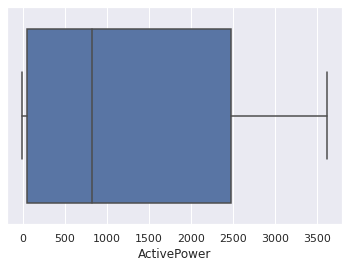

In [ ]:
sns.boxplot(x=data['ActivePower'])

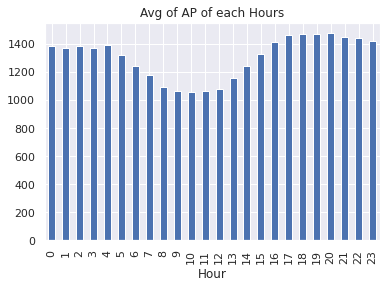

In [ ]:
data.groupby('Hour').mean().ActivePower.plot(kind='bar', title='Avg of AP of each Hours')

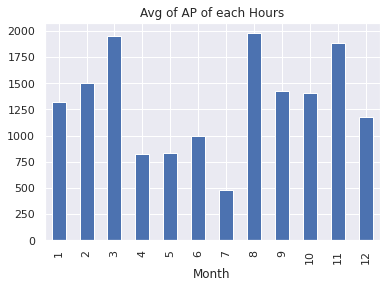

In [ ]:
data.groupby('Month').mean().ActivePower.plot(kind='bar', title='Avg of AP of each Hours')

In [ ]:
data['loss'] = data['Power_Curve'] - data['ActivePower']
data

,ActivePower,WindSpeed,Power_Curve,WindDirection,DateTime,Month,Day,Hour,loss
0,380.047791,5.311336,416.328908,259.994904,2018-01-01 00:00:00,1,1,0,36.281117
1,453.769196,5.672167,519.917511,268.641113,2018-01-01 00:10:00,1,1,0,66.148316
2,306.376587,5.216037,390.900016,272.564789,2018-01-01 00:20:00,1,1,0,84.523429
3,419.645905,5.659674,516.127569,271.258087,2018-01-01 00:30:00,1,1,0,96.481664
4,380.650696,5.577941,491.702972,265.674286,2018-01-01 00:40:00,1,1,0,111.052276
...,...,...,...,...,...,...,...,...,...
50525,2963.980957,11.404030,3397.190793,80.502724,2018-12-31 23:10:00,12,31,23,433.209835
50526,1684.353027,7.332648,1173.055771,84.062599,2018-12-31 23:20:00,12,31,23,-511.297256
50527,2201.106934,8.435358,1788.284755,84.742500,2018-12-31 23:30:00,12,31,23,-412.822178
50528,2515.694092,9.421366,2418.382503,84.297913,2018-12-31 23:40:00,12,31,23,-97.311588


In [ ]:
data.set_index('DateTime', inplace=True)

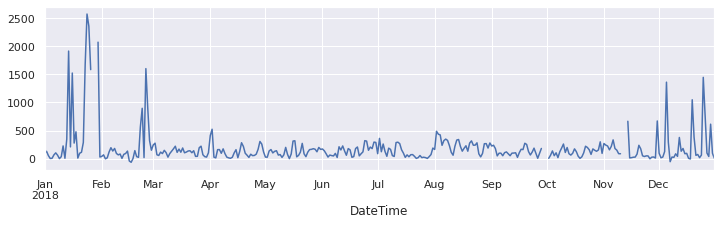

In [ ]:
data.resample('D').mean().loss.plot(figsize=(12,3))

In [ ]:
X = data[['WindSpeed', 'WindDirection']]
y = data['ActivePower'] 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
r_sq = lm.score(X_train, y_train)
print(r_sq)

0.8336182741445949
